# Infill and k sensitivity results
This file plots results of the k sensitivity analysis

In [1]:
# Import Libraries
# Data
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import geopandas as gpd
import random

import re
from copy import deepcopy
#from tqdm import tqdm
import tqdm.notebook as tq

#Viz
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
import seaborn as sns
sns.set(font='Helvetica') # Futura? Calibri Light? 
sns.set_style("white")
sns.set_theme(style='ticks')
sns.set_context('talk')

c:\Users\Keagan Rankin\anaconda3\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


## Import
import sensitivity files and other required information

In [2]:
pop_da = pd.read_csv('C:/Users/Keagan Rankin/OneDrive - University of Toronto/Saxe - Rankin/Project 2. Housing Projections/FIG_Canada/data/houses/da_pop2021.csv').set_index('DAUID')
pop_da = pop_da[~pop_da.index.duplicated(keep='first')]
pop_da

,pop_2021
DAUID,
10010165,500.0
10010166,340.0
10010167,407.0
10010168,523.0
10010169,285.0
...,...
62080024,423.0
62080025,514.0
62080026,868.0


In [5]:
p = 'C:/Users/Keagan Rankin/OneDrive - University of Toronto/Saxe - Rankin/Project 2. Housing Projections/FIG_Canada/results/k_sensitivity/'

# breakdown by infill rate
names = ['sf_i_norm_k_sense_', 'sf_i_d_k_sense_', 'sf_i_all_k_sense_']
f_in = [pd.read_csv(p+names[0]+str(k)+'.csv', index_col=0) for k in np.arange(2,9,2)]
f_id = [pd.read_csv(p+names[1]+str(k)+'.csv', index_col=0) for k in np.arange(2,9,2)]
f_ia = [pd.read_csv(p+names[2]+str(k)+'.csv', index_col=0) for k in np.arange(2,9,2)]

# add the normal forecast as well as it has k=0.8
#p_r = "C:/Users/Keagan Rankin/OneDrive - University of Toronto/Saxe - Rankin/Project 2. Housing Projections/Fig_Canada/results/short-term/"
#n = 'baseline_highgrowth_95q_sf'
#f_in_8 = pd.read_csv(p_r+n+'.csv', index_col=0)
#f_in.insert(3, f_in_8)

In [10]:
len(f_in)
f_in[0]

,house_ghg_pp,road_ghg_pp,water_inf_ghg_pp,iter,tot_pd_check_count,year
DAUID,,,,,,
10070511,34406.222876,5970.919873,873.742451,0,60.0,0
10010526,28806.799052,7411.880445,287.327563,0,135.0,0
10020124,34888.578308,28667.716866,999.362845,0,75.0,0
10030076,31869.665864,1775.180928,349.196003,0,155.0,0
10010550,29460.331364,3369.757525,360.138403,0,160.0,0
...,...,...,...,...,...,...
59070183,5106.638863,0.000000,0.000000,99,255.0,8
59151890,4364.384346,0.000000,0.000000,99,205.0,8
59530025,4746.122105,0.000000,0.000000,99,150.0,8


## Format
formatting to get whatever we want to sensitivity plot

In [13]:
## Functions
def convert_ghg_megaton(res_df, pop_da):
    """
    Convert the results to absolute by multiplying
    by population, convert to tonnes from kg (e-3).
    res_df = results dataframe.
    ont_da = from Importer().
    """
    res_df = res_df.join(pop_da, on='DAUID')
    res_df['house_ghg'] = res_df['house_ghg_pp']*res_df['pop_2021']*10**-3
    res_df['road_ghg'] = res_df['road_ghg_pp']*res_df['pop_2021']*10**-3
    res_df['water_ghg'] = res_df['water_inf_ghg_pp']*res_df['pop_2021']*10**-3
    res_df = res_df.drop(['house_ghg_pp','road_ghg_pp','water_inf_ghg_pp'], axis=1)

    return res_df

    
def group_by_iter(res_df, aggr):
    """
    Group the time series results by iteration using some 
    aggregating average.
    res_df = results dataframe.
    aggr = aggregation function.
    """
    res_df_grouped = res_df.groupby(['year', 'iter']).agg(np.sum).reset_index().groupby('year').agg(aggr)

    return res_df_grouped


def group_convert(res_df, ont_da, aggr):
    res_df_c = convert_ghg_megaton(res_df, ont_da)
    res_df_g = group_by_iter(res_df_c, aggr)
    return res_df_g

In [73]:
fg_in = [group_convert(r, pop_da, np.median) for r in f_in]
fg_id = [group_convert(r, pop_da, np.median) for r in f_id]
fg_ia = [group_convert(r, pop_da, np.median) for r in f_ia]

In [211]:
# Check nationwide infill rate for each situation.
# normal
for i in range(0,4):
    a = f_in[i]['tot_pd_check_count'].sum()
    b = f_in[i][(f_in[i]['road_ghg_pp']==0)]['tot_pd_check_count'].sum()
    print('baseline infill rate: ', b/a)

# double
for i in range(0,4):
    a = f_id[i]['tot_pd_check_count'].sum()
    b = f_id[i][(f_id[i]['road_ghg_pp']==0)]['tot_pd_check_count'].sum()
    print('baseline infill rate: ', b/a)

baseline infill rate:  0.3081453521640549
baseline infill rate:  0.308100251445302
baseline infill rate:  0.30810041480862416
baseline infill rate:  0.30807422712770266
baseline infill rate:  0.6240291282313208
baseline infill rate:  0.6240284467968067
baseline infill rate:  0.6240888148710676
baseline infill rate:  0.6240738376350016


In [215]:
len(fg_in)

5

In [76]:
c_names = ['k 0.2', 'k 0.4', 'k 0.6', 'k 1.0']
c_names_n = ['k 0.2', 'k 0.4', 'k 0.6', 'k 0.8', 'k 1.0']

# change range to 5 on first ones if k=0.8 is imported
strats_in = pd.concat([fg_in[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1).cumsum()*10**-6 for i in range(4)], axis=1)
strats_in_d = pd.concat([fg_in[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1)*10**-6 for i in range(4)], axis=1)
strats_in.columns = c_names
strats_in_d.columns = c_names

strats_id = pd.concat([fg_id[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1).cumsum()*10**-6 for i in range(4)], axis=1)
strats_id_d = pd.concat([fg_id[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1)*10**-6 for i in range(4)], axis=1)
strats_id.columns = c_names
strats_id_d.columns = c_names

strats_ia = pd.concat([fg_ia[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1).cumsum()*10**-6 for i in range(4)], axis=1)
strats_ia_d = pd.concat([fg_ia[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1)*10**-6 for i in range(4)], axis=1)
strats_ia.columns = c_names
strats_ia_d.columns = c_names

In [219]:
strats_in

,k 0.2,k 0.4,k 0.6,k 0.8,k 1.0
year,,,,,
0,17.281251,18.435893,19.593674,20.717952,21.885186
1,35.172105,37.521005,39.855638,42.157573,44.516227
2,56.160859,59.933205,63.690277,67.401880,71.193625
3,84.208974,89.982472,95.730391,101.395344,107.152704
4,122.615934,131.170169,139.706718,148.166032,156.720273
5,171.151141,183.274758,195.379226,207.427899,219.563416
6,226.188324,242.407884,258.590102,274.718389,290.941375
7,284.300122,304.794636,325.305446,345.775380,366.292338
8,343.547185,368.445102,393.374847,418.259631,443.181268


## Plot
plot a 2-D sensivity surface plot, fitting using scipy much like in all_sampling.ipynb for FIG-Ontario with the PCA

In [226]:
gridder

,infill rate,k value,cumulative emissions,2030 emissions
0,0.308,0.2,343.547185,59.247063
1,0.308,0.4,368.445102,63.650465
2,0.308,0.6,393.374847,68.069401
3,0.308,0.8,418.259631,72.484251
4,0.308,1.0,443.181268,76.888930
0,0.624,0.2,224.135863,59.247063
1,0.624,0.4,274.540625,63.650465
2,0.624,0.6,324.989235,68.069401
3,0.624,1.0,425.949409,76.888930
0,1.000,0.2,81.534731,14.128254


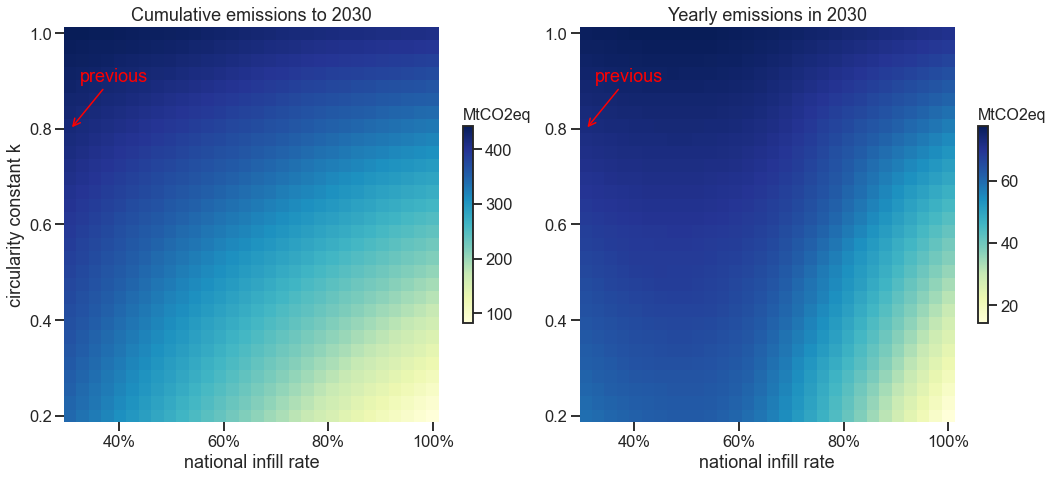

In [275]:
# put into arrays
# cumulative total emissions in 2030, high growth
k = [0.2, 0.4, 0.6, 1.0]
kn = [0.2, 0.4, 0.6, 0.8, 1.0]
infill = [0.308, 0.624, 1.000]
z = []
strats = [strats_in, strats_id, strats_ia]
strats_d = [strats_in_d, strats_in_d, strats_ia_d]

for i, strat in enumerate(strats):
    clist = c_names if i>0 else c_names_n
    z.append(pd.DataFrame({'infill rate':np.full(4 if i>0 else 5, infill[i]),
                           'k value':k if i>0 else kn,
                           'cumulative emissions':[strat[c][8] for c in clist],
                           '2030 emissions':[strats_d[i][c][8] for c in clist]})
    )
gridder = pd.concat(z)

# fit and format grid
x = gridder['infill rate'].squeeze()*100 # squeeze converts to required shape (n,)
y = gridder['k value'].squeeze()
z = gridder['cumulative emissions'].squeeze()
z2 = gridder['2030 emissions'].squeeze()

grid=30 # gridsize
highlow = [0, 450]
spacing = grid # x by x grid
xi, yi = np.linspace(x.min(), x.max(), spacing), np.linspace(y.min(), 
                    y.max(), spacing)
xx, yy = np.meshgrid(xi, yi)
zz = sp.interpolate.griddata(points=(x,y), values=z, xi=(xx, yy), method='cubic')
zz2 = sp.interpolate.griddata(points=(x,y), values=z2, xi=(xx, yy), method='cubic')

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,7))
c = ax[0].pcolor(xx, yy, zz, cmap='YlGnBu', linewidth=0,)# vmin=highlow[0], vmax=highlow[1],)#cmap='rocket_r')#cmap='crest')
cbar = fig.colorbar(c, shrink=0.5, ax=ax[0],)
c2 = ax[1].pcolor(xx, yy, zz2, cmap='YlGnBu', linewidth=0) #vmin=highlow[0], vmax=highlow[1],)#cmap='rocket_r')#cmap='crest')
cbar2 = fig.colorbar(c2, shrink=0.5, ax=ax[1])
cbar.ax.set_title('MtCO2eq', size=16, loc='left')
cbar2.ax.set_title('MtCO2eq', size=16, loc='left')

# options
t = ['Cumulative emissions to 2030', 'Yearly emissions in 2030']
for i, a in enumerate(ax.reshape(-1)):
    a.set_title(t[i])
    a.set_xlabel('national infill rate')
    a.set_ylabel('circularity constant k')
    a.spines[['top','right','bottom','left']].set_visible(False)
    a.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    a.xaxis.set_major_formatter(mtick.PercentFormatter())
ax[1].set_ylabel('')

# add labels
ax[0].annotate('previous', (30.8, 0.8), xytext=(32.5,0.9), arrowprops=dict(arrowstyle='->',color='red'), color='red')
ax[1].annotate('previous', (30.8, 0.8), xytext=(32.5,0.9), arrowprops=dict(arrowstyle='->',color='red'), color='red')

plt.tight_layout()
plt.savefig('test.svg', bbox_inches='tight')

## Summary Statistics
for paper body information

In [284]:
gridder.reset_index()

k860i = np.average([gridder.reset_index().loc[7,'cumulative emissions'],gridder.reset_index().loc[8,'cumulative emissions']])
print('percent change 0.8 to 0.4 k at 62% infill', (k860i-gridder.reset_index().loc[5,'cumulative emissions'])/k860i)

k8100i = np.average([gridder.reset_index().loc[11,'cumulative emissions'],gridder.reset_index().loc[12,'cumulative emissions']])
print('percent change 0.8 to 0.4 k at 100% infill', (k8100i-gridder.reset_index().loc[9,'cumulative emissions'])/k8100i)

percent change 0.8 to 0.4 k at 62% infill 0.40305146063743924
percent change 0.8 to 0.4 k at 100% infill 0.7499702056808933


## Broken down by province?
we can make this a bit more interesting by breaking down by province, or by 2030 vs cumulative

In [110]:
fg_in_ont = [group_convert(r[r.index.astype(str).str.startswith('35')], pop_da, np.median) for r in f_in]
fg_id_ont = [group_convert(r[r.index.astype(str).str.startswith('35')], pop_da, np.median) for r in f_id]
fg_ia_ont = [group_convert(r[r.index.astype(str).str.startswith('35')], pop_da, np.median) for r in f_ia]

In [116]:
c_names = ['k 0.2', 'k 0.4', 'k 0.6', 'k 1.0']

strats_in = pd.concat([fg_in_ont[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1).cumsum()*10**-6 for i in range(4)], axis=1)
strats_in_d = pd.concat([fg_in_ont[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1)*10**-6 for i in range(4)], axis=1)
strats_in.columns = c_names
strats_in_d.columns = c_names

strats_id = pd.concat([fg_id_ont[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1).cumsum()*10**-6 for i in range(4)], axis=1)
strats_id_d = pd.concat([fg_id_ont[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1)*10**-6 for i in range(4)], axis=1)
strats_id.columns = c_names
strats_id_d.columns = c_names

strats_ia = pd.concat([fg_ia_ont[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1).cumsum()*10**-6 for i in range(4)], axis=1)
strats_ia_d = pd.concat([fg_ia_ont[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1)*10**-6 for i in range(4)], axis=1)
strats_ia.columns = c_names
strats_ia_d.columns = c_names

# Check nationwide infill rate for each situation.
# normal
for i in range(0,4):
    a = f_in[i]['tot_pd_check_count'].sum()
    b = f_in[i][(f_in[i]['road_ghg_pp']==0)]['tot_pd_check_count'].sum()
    print('baseline infill rate: ', b/a)

# double
for i in range(0,4):
    a = f_id[i]['tot_pd_check_count'].sum()
    b = f_id[i][(f_id[i]['road_ghg_pp']==0)]['tot_pd_check_count'].sum()
    print('baseline infill rate: ', b/a)

baseline infill rate:  0.3081453521640549
baseline infill rate:  0.308100251445302
baseline infill rate:  0.30810041480862416
baseline infill rate:  0.3080768457084422
baseline infill rate:  0.6240291282313208
baseline infill rate:  0.6240284467968067
baseline infill rate:  0.6240888148710676
baseline infill rate:  0.6240738376350016


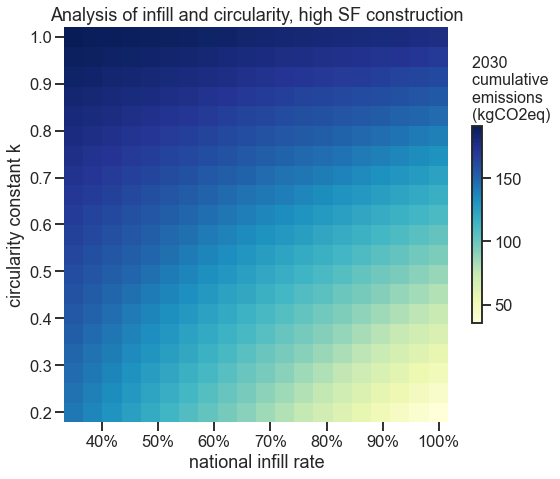

In [120]:
# put into arrays
# cumulative total emissions in 2030, high growth
k = [0.2, 0.4, 0.6, 1.0]
infill = [0.35, 0.7, 1.000]
z = []
strats = [strats_in, strats_id, strats_ia]

for i, strat in enumerate(strats):
    z.append(pd.DataFrame({'infill rate':np.full(4, infill[i]),
                           'k value':k,
                           'cumulative emissions':[strat[c][8] for c in c_names]})
    )
gridder = pd.concat(z)

# fit and format grid
x = gridder['infill rate'].squeeze()*100 # squeeze converts to required shape (n,)
y = gridder['k value'].squeeze()
z = gridder['cumulative emissions'].squeeze()

grid=20 # gridsize
highlow = [0, 200]
spacing = grid # x by x grid
xi, yi = np.linspace(x.min(), x.max(), spacing), np.linspace(y.min(), 
                    y.max(), spacing)
xx, yy = np.meshgrid(xi, yi)
zz = sp.interpolate.griddata(points=(x,y), values=z, xi=(xx, yy), method='cubic')

# Plot
fig, ax = plt.subplots(figsize=(8,7))
c = ax.pcolor(xx, yy, zz, cmap='YlGnBu', )#vmin=highlow[0], vmax=highlow[1],)#cmap='rocket_r')#cmap='crest')
cbar = fig.colorbar(c, shrink=0.5, ax=ax)
cbar.ax.set_title('2030 \ncumulative \nemissions \n(kgCO2eq)', size=16, loc='left')

# options
ax.set_title('Analysis of infill and circularity, high SF construction')
ax.set_xlabel('national infill rate')
ax.set_ylabel('circularity constant k')
ax.spines[['top','right','bottom','left']].set_visible(False)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()

In [111]:
f_in[0][(f_in[0].index >= 35000000) & (f_in[0].index < 36000000)]

,house_ghg_pp,road_ghg_pp,water_inf_ghg_pp,iter,tot_pd_check_count,year
DAUID,,,,,,
35390456,26420.103932,1204.417620,442.709230,0,180.0,0
35251032,18440.752381,918.044186,226.332296,0,90.0,0
35280274,29274.549247,6457.087737,116.785558,0,270.0,0
35220184,19029.775106,1096.300181,237.199099,0,205.0,0
35180762,24717.795518,12822.787805,1046.975180,0,125.0,0
...,...,...,...,...,...,...
35360319,5462.829163,0.000000,0.000000,99,130.0,8
35061833,4989.225732,0.000000,0.000000,99,105.0,8
35190569,4282.786952,0.000000,0.000000,99,100.0,8


# ==================================================================================================================================
## Repeat the sensitivity analysis but for the best-in-class case

In [11]:
# imports
p = 'C:/Users/Keagan Rankin/OneDrive - University of Toronto/Saxe - Rankin/Project 2. Housing Projections/FIG_Canada/results/k_sensitivity/best_case/'

# breakdown by infill rate, with k being the circularity
names = ['best_case_mm_i_norm_k_sense_', 'best_case_mm_i_d_k_sense_', 'best_case_mm_i_all_k_sense_']
f_in_b = [pd.read_csv(p+names[0]+str(k)+'_2030_add.csv', index_col=0) for k in np.arange(2,9,2)]
f_id_b = [pd.read_csv(p+names[1]+str(k)+'_2030_add.csv', index_col=0) for k in np.arange(2,9,2)]
f_ia_b = [pd.read_csv(p+names[2]+str(k)+'_2030_add.csv', index_col=0) for k in np.arange(2,9,2)]

# add the normal forecast as well as it has k=0.8
#p_r = "C:/Users/Keagan Rankin/OneDrive - University of Toronto/Saxe - Rankin/Project 2. Housing Projections/Fig_Canada/results/short-term/"
#n = 'bic_matred_highgrowth_95q_mm'
#f_in_8 = pd.read_csv(p_r+n+'.csv', index_col=0)
#f_in_b.insert(3, f_in_8)

In [14]:
# group data
fg_in_b = [group_convert(r, pop_da, np.median) for r in f_in_b]
fg_id_b = [group_convert(r, pop_da, np.median) for r in f_id_b]
fg_ia_b = [group_convert(r, pop_da, np.median) for r in f_ia_b]

In [15]:
c_names = ['k 0.2', 'k 0.4', 'k 0.6', 'k 1.0']
c_names_n = ['k 0.2', 'k 0.4', 'k 0.6', 'k 1.0']#['k 0.2', 'k 0.4', 'k 0.6', 'k 0.8', 'k 1.0']

# change range to 5 on first ones if k=0.8 is imported
strats_in_b = pd.concat([fg_in_b[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1).cumsum()*10**-6 for i in range(4)], axis=1)
strats_in_d_b = pd.concat([fg_in_b[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1)*10**-6 for i in range(4)], axis=1)
strats_in_b.columns = c_names_n
strats_in_d_b.columns = c_names_n

strats_id_b = pd.concat([fg_id_b[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1).cumsum()*10**-6 for i in range(4)], axis=1)
strats_id_d_b = pd.concat([fg_id_b[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1)*10**-6 for i in range(4)], axis=1)
strats_id_b.columns = c_names
strats_id_d_b.columns = c_names

strats_ia_b = pd.concat([fg_ia_b[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1).cumsum()*10**-6 for i in range(4)], axis=1)
strats_ia_d_b = pd.concat([fg_ia_b[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1)*10**-6 for i in range(4)], axis=1)
strats_ia_b.columns = c_names
strats_ia_d_b.columns = c_names

Summary statistics for paragraph on Figure four in section 3.2.1

In [20]:
# shift at current national infill rate from k=0.8 to k=0.4
store1 = np.mean([strats_in_d_b.loc[1,'k 0.6'], strats_in_d_b.loc[1,'k 1.0']]) - strats_in_d_b.loc[1,'k 0.4']
print(store1)

# at double national infill rate
store2 = np.mean([strats_id_d_b.loc[1,'k 0.6'], strats_id_d_b.loc[1,'k 1.0']]) - strats_id_d_b.loc[1,'k 0.4']
print(store2)

# maxmimum possible savings from 100% infill
store3 = np.mean([strats_in_d_b.loc[1,'k 0.6'], strats_in_d_b.loc[1,'k 1.0']]) - np.mean([strats_ia_d_b.loc[1,'k 0.6'], strats_ia_d_b.loc[1,'k 1.0']])
store3 = strats_in_d_b.loc[1,'k 1.0'] - strats_ia_d_b.loc[1,'k 1.0']
print(store3)


print(strats_in_d_b)
print(strats_ia_d_b)
# bests case value
#strats_ia_d_b#.loc[1,'k 1.0']
#np.mean([strats_ia_d_b.loc[1,'k 0.6'], strats_ia_d_b.loc[1,'k 1.0']])

1.9370610674066437
3.852049193892336
1.484625062176649
          k 0.2      k 0.4      k 0.6      k 1.0
year                                            
0     13.020398  13.988651  14.933333  16.872620
1     13.038102  13.992085  14.963145  16.895146
         k 0.2     k 0.4     k 0.6      k 1.0
year                                         
0     3.117913  6.187106  9.267992  15.376591
1     3.123383  6.192022  9.260936  15.410521


12.335728499999998


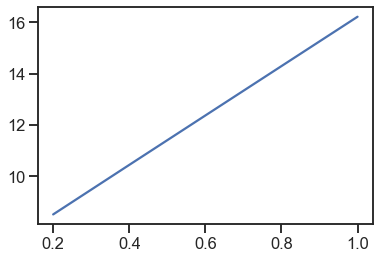

In [17]:
print((9.260936+15.410521)/2)
plt.plot([0.2,0.4,0.6,1], strats_id_d_b.loc[1])

In [98]:
# =============================
# This code reduces the number of samples to get the sensitvity for the BAU case, specifically for 100% infill and double circularity (k=0.4) for the 2030 strategies waterfall plot in the paper.
f_ia_b[0][(f_ia_b[0]['year'] == 0) & (f_ia_b[0]['iter'] == 0)].iloc[:1130,:].sum()['tot_pd_check_count']

# cutting the sample to try and match BAU 2030 housing starts: 283387, the rest of our sim is a bit above.
# 1110 is about right
cut = 1110
cut_store_2 = []
cut_store_4 = []
cut_store_6 = []
cut_store_8 = []
for i in range(100):
    # k 0.2
    cut_store_2.append(f_ia_b[0][(f_ia_b[0]['year'] == 1) & (f_ia_b[0]['iter'] == i)].iloc[:cut,:])
    # k 0.4
    cut_store_4.append(f_ia_b[1][(f_ia_b[1]['year'] == 1) & (f_ia_b[1]['iter'] == i)].iloc[:cut,:])
    # k 0.6
    cut_store_6.append(f_ia_b[2][(f_ia_b[2]['year'] == 1) & (f_ia_b[2]['iter'] == i)].iloc[:cut,:])
    # k 0.8
    cut_store_8.append(f_ia_b[3][(f_ia_b[3]['year'] == 1) & (f_ia_b[3]['iter'] == i)].iloc[:cut,:])

# determine around the correct amount of cuts
print(pd.concat(cut_store_2).groupby('iter').sum()['tot_pd_check_count'].mean())
print(pd.concat(cut_store_4).groupby('iter').sum()['tot_pd_check_count'].mean())
# =============================

# Get the values for 100% infill k=0.2 and k=0.4 for this reduced sample BAU case
fg_ia_bau = [group_convert(r, pop_da, np.median) for r in [pd.concat(cut_store_2), pd.concat(cut_store_4), 
                                                           pd.concat(cut_store_6), pd.concat(cut_store_8)]]

strats_ia_bau_d = pd.concat([fg_ia_bau[i][['house_ghg','road_ghg','water_ghg']].sum(axis=1)*10**-6 for i in range(4)], axis=1)
strats_ia_bau_d.columns = c_names

# results for 2030 plot
print('100% infill', strats_ia_bau_d['k 0.4'])
print('double circularity k 0.8', (strats_ia_bau_d['k 1.0'][1] + strats_ia_bau_d['k 0.6'][1])/2)

284006.1
284077.05
100% infill year
1    1.600941
Name: k 0.4, dtype: float64
double circularity k 0.8 3.1788882042007964


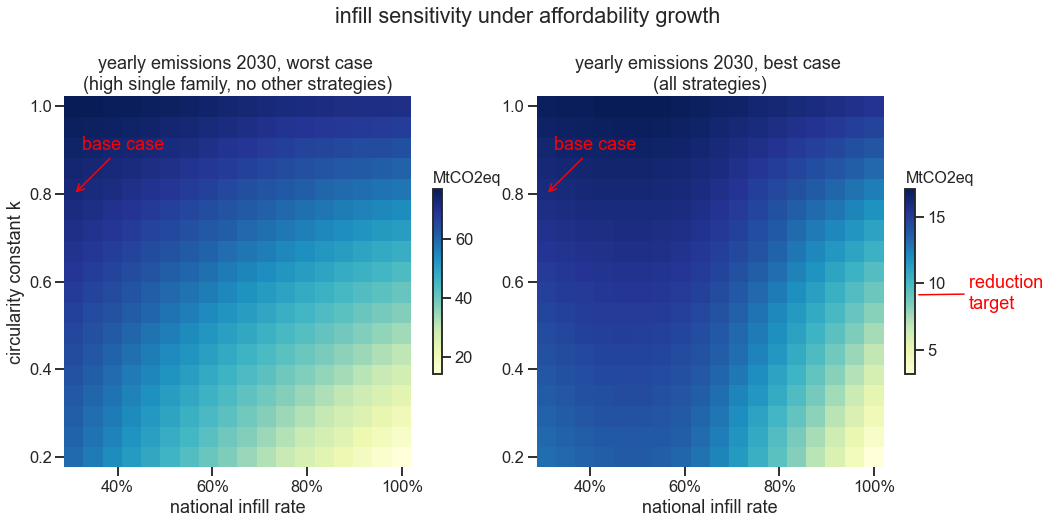

In [146]:
# put into arrays
# cumulative total emissions in 2030, high growth
k = [0.2, 0.4, 0.6, 1.0]
kn = [0.2, 0.4, 0.6, 1.0]
infill = [0.308, 0.624, 1.000]
z = []
strats = [strats_in_d_b, strats_in_d_b, strats_ia_d_b]
strats2 = [strats_in_d, strats_id_d, strats_ia_d]
c_names = ['k 0.2', 'k 0.4', 'k 0.6', 'k 1.0']
c_names2 = ['k 0.2', 'k 0.4', 'k 0.6', 'k 0.8', 'k 1.0']

for i, strat in enumerate(strats):
    clist = c_names if i>0 else c_names2
    z.append(pd.DataFrame({'infill rate':np.full(4, infill[i]),#np.full(4 if i>0 else 5, infill[i]),
                           'k value':k ,#if i>0 else kn,
                           'high sf emissions':[strats2[i][c][8] for c in c_names],
                           'best case emissions':[strats[i][c][1] for c in c_names]})
    )
gridder = pd.concat(z)

# fit and format grid
x = gridder['infill rate'].squeeze()*100 # squeeze converts to required shape (n,)
y = gridder['k value'].squeeze()
z = gridder['high sf emissions'].squeeze()
z2 = gridder['best case emissions'].squeeze()

grid=18 # gridsize
highlow = [0, 450]
spacing = grid # x by x grid
xi, yi = np.linspace(x.min(), x.max(), spacing), np.linspace(y.min(), 
                    y.max(), spacing)
xx, yy = np.meshgrid(xi, yi)
zz = sp.interpolate.griddata(points=(x,y), values=z, xi=(xx, yy), method='cubic')
zz2 = sp.interpolate.griddata(points=(x,y), values=z2, xi=(xx, yy), method='cubic')

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,7.5))
c = ax[0].pcolor(xx, yy, zz, cmap='YlGnBu', linewidth=0,)# vmin=highlow[0], vmax=highlow[1],)#cmap='rocket_r')#cmap='crest')
cbar = fig.colorbar(c, shrink=0.5, ax=ax[0],)
c2 = ax[1].pcolor(xx, yy, zz2, cmap='YlGnBu', linewidth=0) #vmin=highlow[0], vmax=highlow[1],)#cmap='rocket_r')#cmap='crest')
cbar2 = fig.colorbar(c2, shrink=0.5, ax=ax[1])
cbar.ax.set_title('MtCO2eq', size=16, loc='left')
cbar2.ax.set_title('MtCO2eq', size=16, loc='left')

# options
t = ['yearly emissions 2030, worst case \n(high single family, no other strategies)', 
     'yearly emissions 2030, best case \n(all strategies)']
for i, a in enumerate(ax.reshape(-1)):
    a.set_title(t[i])
    a.set_xlabel('national infill rate')
    a.set_ylabel('circularity constant k')
    a.spines[['top','right','bottom','left']].set_visible(False)
    a.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    a.xaxis.set_major_formatter(mtick.PercentFormatter())
ax[1].set_ylabel('')

# add labels
ax[0].annotate('base case', (30.8, 0.8), xytext=(32.5,0.9), arrowprops=dict(arrowstyle='->',color='red'), color='red')
ax[1].annotate('base case', (30.8, 0.8), xytext=(32.5,0.9), arrowprops=dict(arrowstyle='->',color='red'), color='red')
ax[1].annotate('reduction \ntarget', (109, 0.57), xytext=(120,0.538), arrowprops=dict(arrowstyle='-',color='red'), color='red', 
               annotation_clip=False)

fig.suptitle('infill sensitivity under affordability growth')
plt.tight_layout()
#plt.savefig('plt3.svg', bbox_inches='tight')

Honestly the high sf plot really isn't necessary, we can remove it.

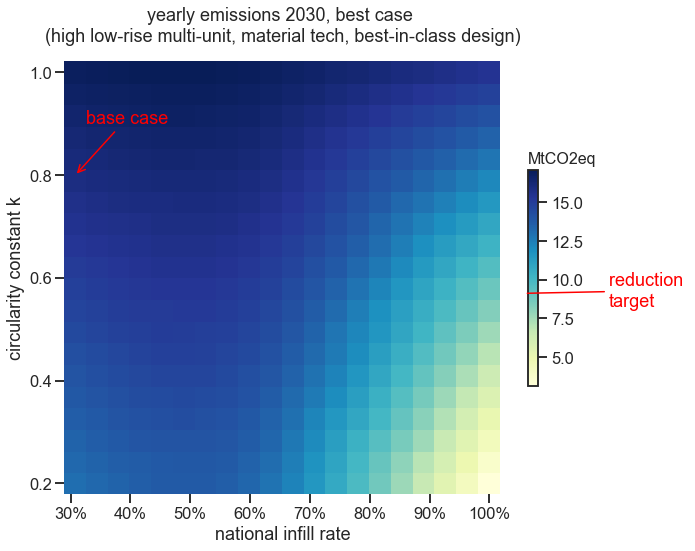

In [187]:
# fit and format grid
x = gridder['infill rate'].squeeze()*100 # squeeze converts to required shape (n,)
y = gridder['k value'].squeeze()
z2 = gridder['best case emissions'].squeeze()

grid=20 # gridsize
highlow = [0, 450]
spacing = grid # x by x grid
xi, yi = np.linspace(x.min(), x.max(), spacing), np.linspace(y.min(), 
                    y.max(), spacing)
xx, yy = np.meshgrid(xi, yi)
zz2 = sp.interpolate.griddata(points=(x,y), values=z2, xi=(xx, yy), method='cubic')

# Plot
fig, ax = plt.subplots(figsize=(10,8))
c2 = ax.pcolor(xx, yy, zz2, cmap='YlGnBu', linewidth=0) #vmin=highlow[0], vmax=highlow[1],)#cmap='rocket_r')#cmap='crest')
cbar2 = fig.colorbar(c2, shrink=0.5, ax=ax)
cbar.ax.set_title('MtCO2eq', size=16, loc='left')
cbar2.ax.set_title('MtCO2eq', size=16, loc='left')
cbar2.ax.zorder=-1

# options
t = ['yearly emissions 2030, worst case \n(high single family, no other strategies)', 
     'yearly emissions 2030, best case \n(high low-rise multi-unit, material tech, best-in-class design)']

ax.set_title(t[i], pad=20)
ax.set_xlabel('national infill rate')
ax.set_ylabel('circularity constant k')
ax.spines[['top','right','bottom','left']].set_visible(False)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

# add labels
ax.annotate('base case', (30.8, 0.8), xytext=(32.5,0.9), arrowprops=dict(arrowstyle='->',color='red'), color='red')
ax.annotate('reduction \ntarget', (106, 0.57), xytext=(120,0.545), arrowprops=dict(arrowstyle='-',color='red'), color='red', 
               annotation_clip=False)
#ax.text(x=105, y=0.5 ,s='foo', bbox=dict(boxstyle='square,pad=0.3'))

#fig.suptitle('infill sensitivity under affordability growth')
plt.tight_layout()
#plt.savefig('plt3_single5.svg', bbox_inches='tight')